In [74]:
import os
import pickle
import imageio
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.image import extract_face_landmarks

import dlib

import numpy as np

In [79]:
import dlib
import cv2

In [75]:
left_eye = np.array([36, 37, 38, 39, 40, 41])
right_eye = np.array([42, 43, 44, 45, 46, 47])

In [77]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

In [6]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_01 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0001.jpg')

In [80]:
img = plt.imread(putin_01)
predictor = dlib.shape_predictor(args["shape_predictor"])
shape = predictor(img)
print(shape.shape)
print('\n\nFirst 10 landmarks:\n', shape[:10])

NameError: name 'args' is not defined

In [16]:
img = plt.imread(putin_01)
landmarks = extract_face_landmarks(img)
print(landmarks.shape)
print('\n\nFirst 10 landmarks:\n', landmarks[:10])

(68, 2)


First 10 landmarks:
 [[ 12  30]
 [ 13  43]
 [ 15  55]
 [ 18  66]
 [ 21  77]
 [ 26  86]
 [ 33  95]
 [ 41 101]
 [ 53 102]
 [ 66 102]]


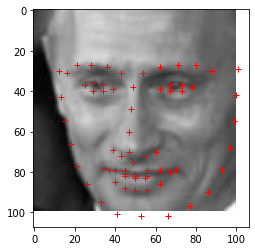

In [33]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
for x,y in landmarks:
    ax.plot(x, y, 'r+')

In [54]:
detector = dlib.get_frontal_face_detector()
detections = detector(img, 1)

In [55]:
len(detections)

1

In [56]:
a = detections.pop()

In [59]:
a

rectangle(6,17,96,106)

In [67]:
a.width()

91

In [ ]:
# At this point, we create landmark detectors and test them:
print("testing LBF")
facemark = cv2.face.createFacemarkLBF()
facemark .loadModel("lbfmodel.yaml")
ok, landmarks = facemark.fit(image , faces)
print ("landmarks LBF", ok, landmarks)